<a href="https://colab.research.google.com/github/Chefmine8/70-s-RP/blob/main/Neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimensions de x: (100, 2)
dimensions de y: (100, 1)


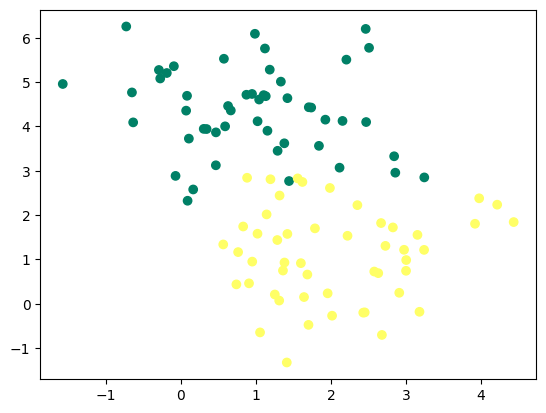

In [28]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de x:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [29]:
def init(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)
  return (W, b)

In [30]:
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))
  return A

In [31]:
def log_loss(A, y):
  return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [32]:
def gradient(A, X, y):
  dW = 1 / len (y) * np.dot(X.T, A - y)
  db = 1 / len(y) * np.sum(A - y)
  return (dW, db)

In [52]:
def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b -learning_rate * db
  return (W, b)

In [81]:
def predict(X, W, b):
  A = model(X, W, b)
  print(A)
  return A >= 0.5

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
  #initi W, b
  W, b = init(X)

  Loss = []

  for i in range(n_iter):
      A = model(X, W, b)
      Loss.append(log_loss(A, y))
      dW, db = gradient(A, X, y)
      W, b = update(dW, db, W, b, learning_rate)

  y_pred = predict(X, W, b)
  print(accuracy_score(y, y_pred))

  plt.plot(Loss)
  plt.show()

  return (W, b)

[[9.71693413e-01]
 [8.47766788e-01]
 [3.53079928e-03]
 [1.58206788e-01]
 [9.74282308e-01]
 [3.61316433e-01]
 [5.68071235e-02]
 [9.55030503e-01]
 [3.92840688e-02]
 [9.21499597e-01]
 [2.33463221e-02]
 [9.18630176e-01]
 [1.63873645e-02]
 [1.35141925e-02]
 [7.71855836e-01]
 [9.86713466e-01]
 [9.95235779e-01]
 [3.00178936e-02]
 [8.23430314e-01]
 [7.18230627e-01]
 [3.24028570e-02]
 [2.76265082e-02]
 [4.23573001e-01]
 [3.36143657e-03]
 [9.68874526e-01]
 [2.28338833e-02]
 [9.37612973e-01]
 [4.62510890e-03]
 [4.81807877e-02]
 [7.77037433e-01]
 [9.88357013e-01]
 [3.20144809e-02]
 [7.58576471e-01]
 [9.88540390e-01]
 [4.19808666e-01]
 [1.94452457e-01]
 [8.45704303e-01]
 [5.75056262e-01]
 [4.69196439e-01]
 [5.43245946e-01]
 [7.00616955e-02]
 [4.35245677e-02]
 [4.52763662e-04]
 [1.50002955e-01]
 [2.05174587e-01]
 [8.77470238e-01]
 [9.82298783e-01]
 [9.80005925e-01]
 [3.31328853e-03]
 [5.69369244e-03]
 [9.64399930e-01]
 [6.54329019e-01]
 [2.43802382e-02]
 [2.74560551e-02]
 [8.25074486e-01]
 [3.042586

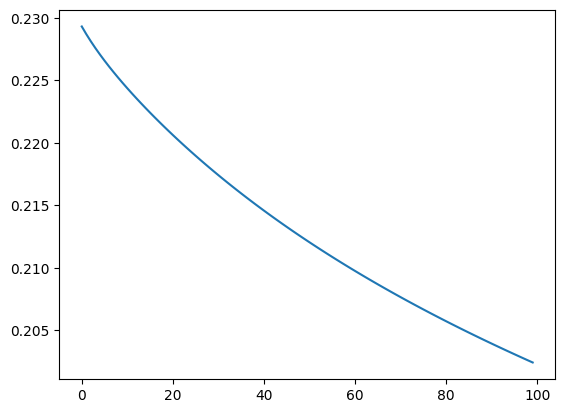

In [85]:
W, b = artificial_neuron(X, y)

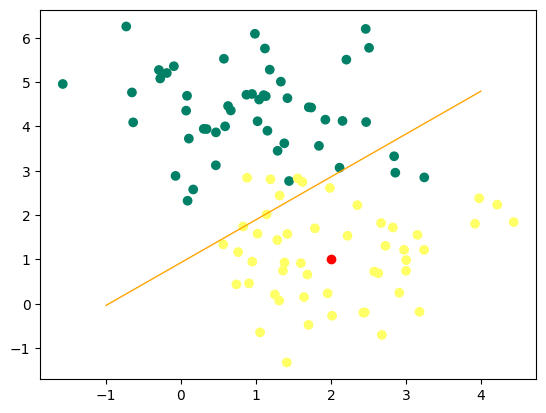

[0.91489283]


array([ True])

In [86]:
new_plant = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = ( -W[0] * x0 - b ) / W[1]

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1] , c='r')
plt.plot(x0, x1, c='orange', lw=1)
plt.show()

predict(new_plant, W, b)